## Data Wrangling
It is a process of `cleaning`, `transforming` and organising data for `analysis` and `visualization`. It is an important step in the data analysis process because raw data is often `incomplete`, `inconsistent`, and an in `unstructured format`, which can make it difficult to work with. Data wrangling helps to make the data more `consistent`, `accurate`, and `useful` for analysis and decision making.

### The Steps for Data Wrangling Typically Includes:
1- Gathering data (Dataset & Libraries)\
2- Tools to clean data (Libraries)\
3- How to do (Steps)

In [190]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
# Import dataset
df = sns.load_dataset("titanic")

In [192]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [193]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [195]:
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [196]:
df.drop("deck", axis=1, inplace=True)
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [197]:
df['age'].fillna(df['age'].mean(), inplace=True)
(df.isnull().mean() * 100).round(2)

survived       0.00
pclass         0.00
sex            0.00
age            0.00
sibsp          0.00
parch          0.00
fare           0.00
embarked       0.22
class          0.00
who            0.00
adult_male     0.00
embark_town    0.22
alive          0.00
alone          0.00
dtype: float64

In [198]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
(df.isnull().mean() * 100).round(2)

survived       0.00
pclass         0.00
sex            0.00
age            0.00
sibsp          0.00
parch          0.00
fare           0.00
embarked       0.00
class          0.00
who            0.00
adult_male     0.00
embark_town    0.22
alive          0.00
alone          0.00
dtype: float64

In [199]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
(df.isnull().mean() * 100).round(2)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

## Outliers Removal

<Axes: xlabel='sex', ylabel='age'>

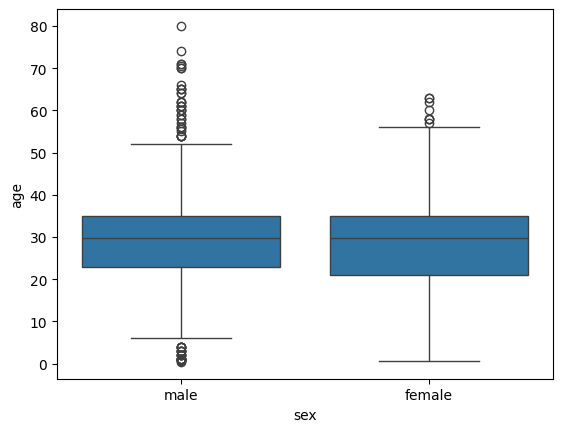

In [200]:
# Visualisation method
sns.boxplot(data=df, x='sex', y='age')

In [201]:
# IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]


In [202]:
df.shape

(825, 14)

In [203]:
# IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]


In [204]:
df.shape

(718, 14)

<Axes: xlabel='sex', ylabel='age'>

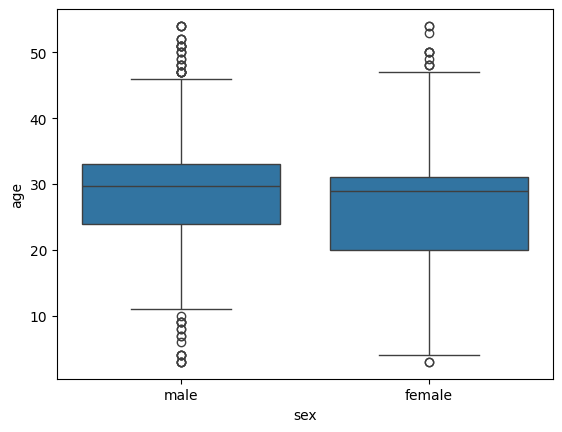

In [205]:
sns.boxplot(data=df, x='sex', y='age')

<Axes: xlabel='age', ylabel='Count'>

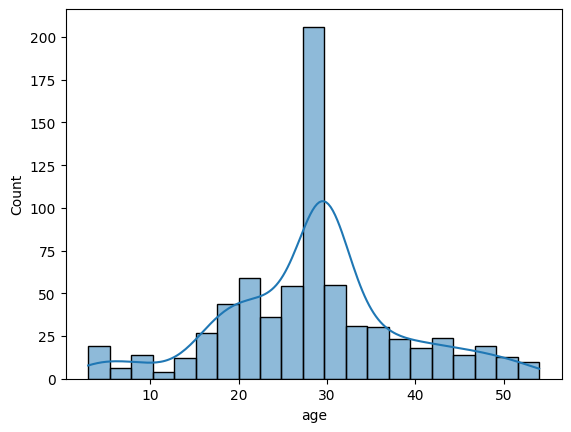

In [206]:
sns.histplot(df['age'], kde=1)

<Axes: xlabel='fare', ylabel='Count'>

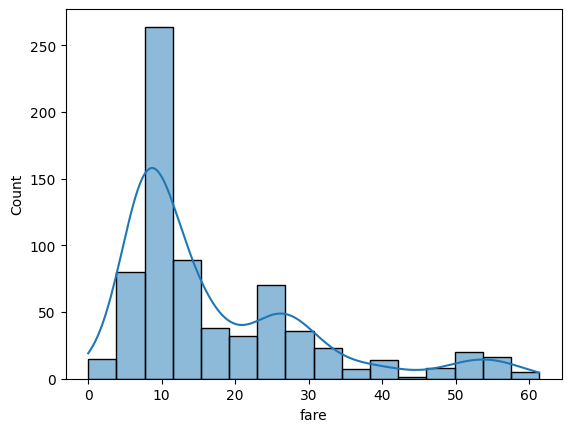

In [207]:
sns.histplot(df['fare'], kde=1)

In [208]:
# Zscore method
from scipy import stats
import numpy as np

z_score = np.abs(stats.zscore(df['age']))
z_threshold = 3
df = df[(np.abs(stats.zscore(df['age'])) <= z_threshold)]

<Axes: xlabel='sex', ylabel='age'>

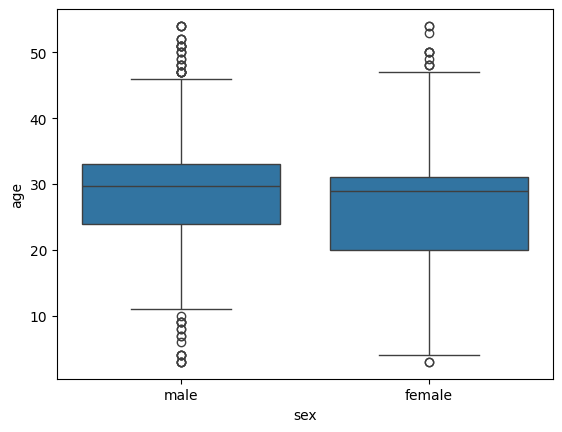

In [209]:
sns.boxplot(data=df, x='sex', y='age')

<Axes: xlabel='age', ylabel='Count'>

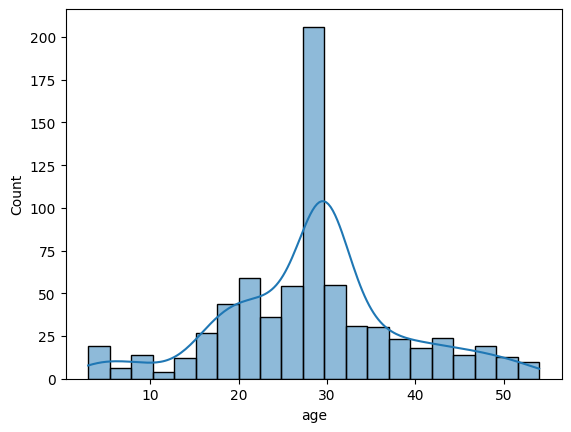

In [210]:
sns.histplot(df['age'], kde=1)

In [211]:
df.shape

(718, 14)

In [212]:
# Finding and dropping duplicates
df.duplicated().sum()

103

In [213]:
df_duplicates = df[df.duplicated()]
df_duplicates.shape

(103, 14)

In [214]:
df.drop_duplicates(inplace=True)

In [215]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [157]:
df.shape

(615, 14)

In [158]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.2 MB 393.8 kB/s eta 0:00:24
   ---------------------------------------- 0.1/9.2 MB 491.5 kB/s eta 0:00:19
   ---------------------------------------- 0.1/9.2 MB 58


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Kabir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [238]:
# Normalization - to bring data at one scale

## Libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

## Data
df

## Select columns to normalize
cols_to_normalize = ['age', 'fare']

## Create the scaler function/tool
scaler = MinMaxScaler()

## Fit and transform the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

## Check the data
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.705882,0,5,0.474509,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,0.313725,0,0,0.488765,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,0.523512,1,2,0.382051,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,0.450980,0,0,0.488765,C,First,man,True,Cherbourg,yes,True,0


In [161]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,0.497584,0.460163,0.365854,0.298831
std,0.480674,0.741063,0.209485,0.894039,0.835572,0.221334
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.372549,0.000000,0.000000,0.128640
50%,0.000000,3.000000,0.523512,0.000000,0.000000,0.211798
75%,1.000000,3.000000,0.607843,1.000000,0.000000,0.423596
max,1.000000,3.000000,1.000000,5.000000,6.000000,1.000000


In [188]:
# Normalization - to bring data at one scale

## Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Data
df

## Select columns to normalize
cols_to_normalize = ['age', 'fare']

## Create the scaler function/tool
scaler = StandardScaler()

## Fit and transform the data on scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

## Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.597354,1,0,-0.817136,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.222648,0,0,-0.767410,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.620441,1,0,2.560585,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.620441,0,0,-0.758201,S,Third,man,True,Southampton,no,True
5,0,3,male,0.123872,0,0,-0.728122,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.995147,0,5,0.794372,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.878384,0,0,0.858832,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.123872,1,2,0.376301,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.222648,0,0,0.858832,C,First,man,True,Cherbourg,yes,True


In [189]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,6.150000e+02,615.000000,615.000000,6.150000e+02
mean,0.360976,2.469919,-5.083558e-16,0.460163,0.365854,-1.155354e-17
std,0.480674,0.741063,1.000814e+00,0.894039,0.835572,1.000814e+00
min,0.000000,1.000000,-2.377209e+00,0.000000,0.000000,-1.351236e+00
25%,0.000000,2.000000,-5.973545e-01,0.000000,0.000000,-7.695610e-01
50%,0.000000,3.000000,1.238725e-01,0.000000,0.000000,-3.935399e-01
75%,1.000000,3.000000,5.267644e-01,1.000000,0.000000,5.641565e-01
max,1.000000,3.000000,2.400296e+00,5.000000,6.000000,3.170505e+00


In [216]:
# Log Transformation
kashti = sns.load_dataset("titanic")
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [217]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [218]:
import numpy as np
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# Log transformation
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])
kashti.head()

C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='fare'>

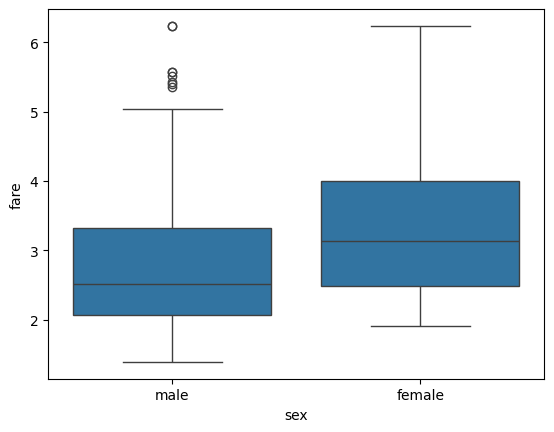

In [220]:
sns.boxplot(data=kashti, x='sex', y='fare')

<Axes: xlabel='age', ylabel='Count'>

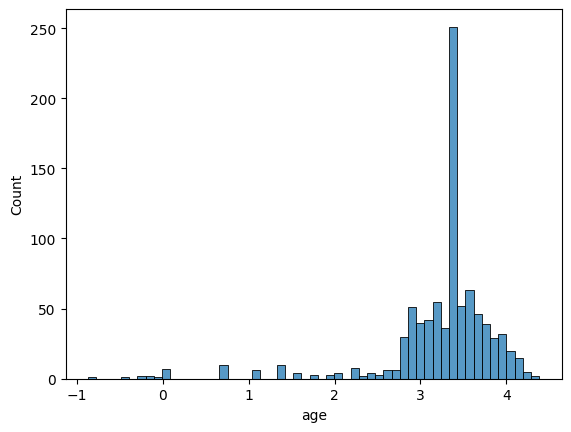

In [222]:
sns.histplot(kashti['age'])

In [223]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [239]:
# Organising the data
df['family_size'] = df['sibsp'] + df['parch'] 

In [225]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kabir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


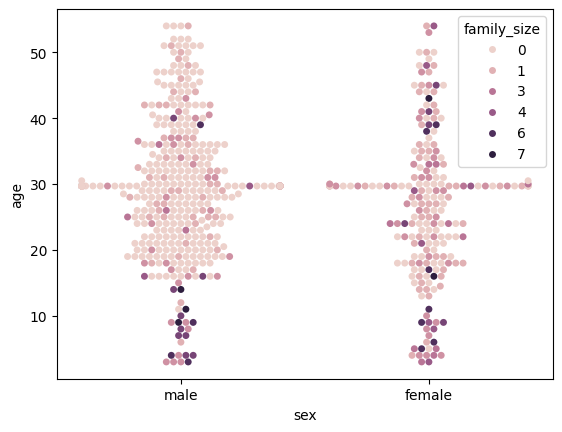

In [230]:
sns.swarmplot(data=df, x="sex", y="age", hue ="family_size")

In [231]:
df = df.rename(columns={'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [235]:
table = pd.pivot_table(df, values='fare', index='pclass',
    columns = "survival", aggfunc=np.mean)
table

C:\Users\Kabir\AppData\Local\Temp\ipykernel_8652\511157874.py:1: FutureWarning: The provided callable <function mean at 0x000001E6CE5368E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, values='fare', index='pclass',


survival,0,1
pclass,,
1,34.735146,40.576028
2,18.137797,20.966551
3,13.099148,13.151933


<Axes: xlabel='fare', ylabel='age'>

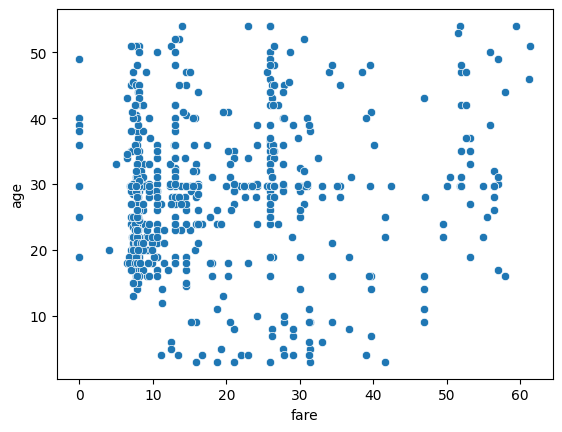

In [236]:
sns.scatterplot(data=df, x='fare', y='age')

In [240]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,0.372549,1,0,0.118118,S,Third,man,True,Southampton,no,False,1
2,1,3,female,0.450980,0,0,0.129115,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.627451,1,0,0.865114,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.627451,0,0,0.131152,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.523512,0,0,0.137804,Q,Third,man,True,Queenstown,no,True,0


In [242]:
# Saving the wrangled data
df.to_csv('titanic_wrangled1.csv', index=False)